## Logistic Regression

In logistic regression, we've got two values or classes, say 0 and 1. The o/p comes on the basis of probability. s-function is the term to define the process. 

In [26]:
# importing the libraries
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 

# import online data 
from sklearn.datasets import load_digits 

digits = load_digits()
x = digits.data
# input variables or features 
digits.data.shape # it means we have 1797 pictures and their size is equal to 64=8*8.



(1797, 64)

In [27]:
# output output lables (y)
digits.target.shape # it means we have only labels but not the images.
y = digits.target 

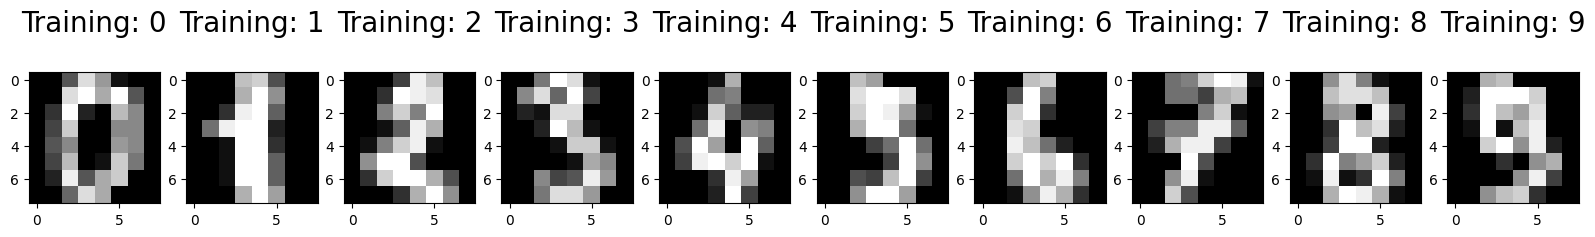

In [23]:
plt.figure(figsize=(20,4)) # where (20,4) is the size of figure
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])): # we've given both image and label as the index
    plt.subplot(1,10, index + 1) # index is kept to add one because of the requirements of the 'for loop' 
    plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
    plt.title('Training: %i\n'% label, fontsize =20)


In [25]:
#help(plt)

In [29]:
# split the data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2) 

print('Train input data: ', x_train.shape)
print('Test input data: ', x_test.shape)
print('Train output data: ', y_train.shape) 
print('Test output data: ', y_test.shape)

Train input data:  (1437, 64)
Test input data:  (360, 64)
Train output data:  (1437,)
Test output data:  (360,)


In [33]:
# model training and fitting 
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression().fit(x_train, y_train)
log_reg

c:\Users\waqar ali\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
# predictions 
log_reg.predict(x_test[0:100])

array([5, 2, 3, 6, 3, 1, 0, 8, 0, 2, 3, 4, 2, 9, 3, 9, 4, 2, 3, 6, 9, 5,
       1, 5, 6, 8, 9, 1, 1, 0, 3, 1, 3, 7, 4, 0, 5, 6, 5, 6, 4, 4, 5, 3,
       9, 8, 0, 4, 8, 1, 1, 0, 8, 3, 9, 2, 9, 2, 4, 8, 3, 5, 5, 1, 5, 7,
       5, 7, 5, 0, 0, 3, 1, 4, 7, 3, 8, 6, 6, 5, 1, 1, 7, 1, 4, 0, 7, 7,
       1, 7, 4, 2, 2, 1, 9, 9, 9, 4, 9, 1])

In [40]:
# accuracy test 
score = log_reg.score(x_test,y_test) # we can use the name model as a varient of log_reg, as we have been using before.
print('The accuracy score is: ', score)

The accuracy score is:  0.9472222222222222


In [45]:
# confusion matrix
predictions = log_reg.predict(x_test)
predictions
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions) # comparing the actual values(y_test) with the predicted values.
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 38,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 39,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 37,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 23,  0,  1],
       [ 0,  5,  1,  0,  1,  0,  0,  0, 33,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 45]], dtype=int64)

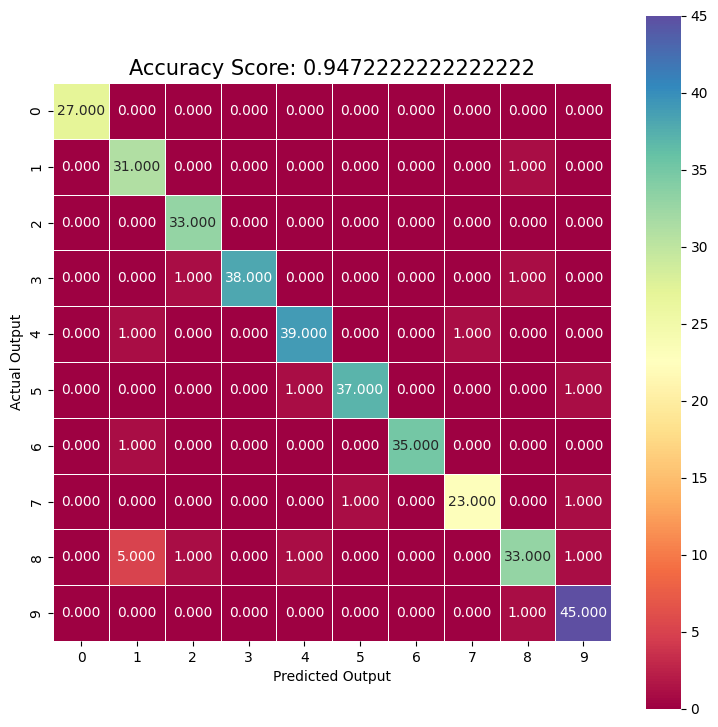

In [46]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot= True, fmt='.3f', linewidths=.5, square= True, cmap = 'Spectral');
plt.ylabel('Actual Output');
plt.xlabel('Predicted Output');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size =15);

In [47]:
print(cm)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  1  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  1 38  0  0  0  0  1  0]
 [ 0  1  0  0 39  0  0  1  0  0]
 [ 0  0  0  0  1 37  0  0  0  1]
 [ 0  1  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  1  0 23  0  1]
 [ 0  5  1  0  1  0  0  0 33  1]
 [ 0  0  0  0  0  0  0  0  1 45]]


In [49]:
# Getting miss classified lables 
index = 0
misclassifiedIndexes = [] # to create a new array of missing values 
for label, predict in zip(y_test,predictions): # label means the o/p 
    if label != predict:
        misclassifiedIndexes.append(index)
        index +=1

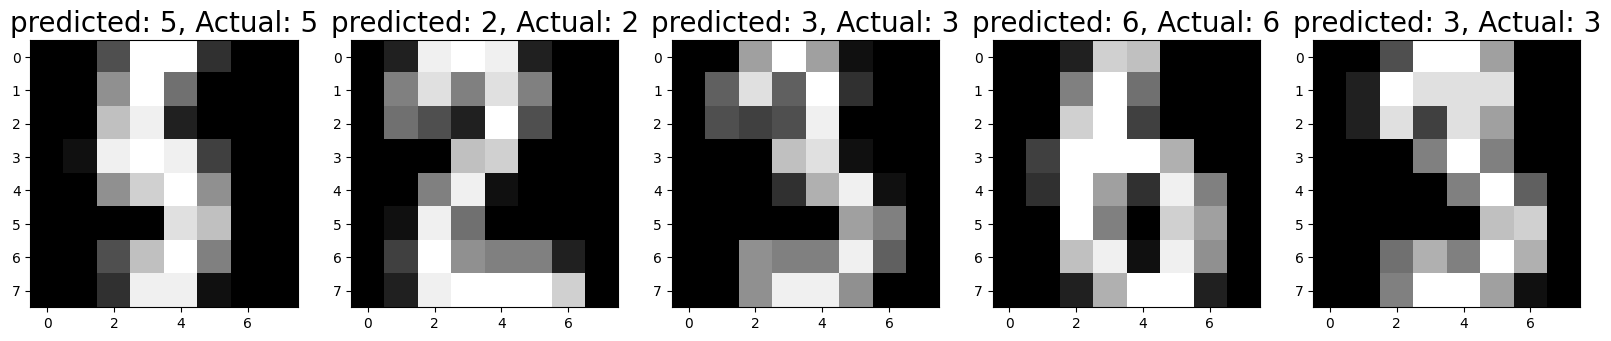

In [56]:
# plotting misclassified labels with known labels 
plt.figure(figsize=(20,4))
for plotindex, badindex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1,5, plotindex+1)
    plt.imshow(np.reshape(x_test[badindex], (8,8)), cmap=plt.cm.gray)
    plt.title("predicted: {}, Actual: {}".format(predictions[badindex], y_test[badindex]), fontsize=20)